# Recurrent Neural Network

<div>
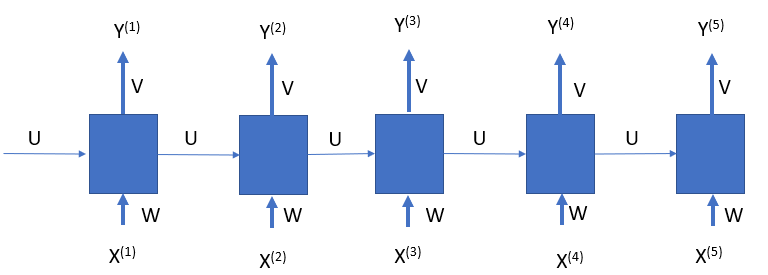
    </div>

<br><br><br><br><br><br><br><br><br>
The Keras RNN API has two types of RNN supports:
- Ease of use (the built-in API):
-- <b>keras.layers.SimpleRNN</b>
-- <b>keras.layers.LSTM</b>
-- <b>keras.layers.GRU layers</b>
- Ease of customization: <b>keras.layers.RNN </b>

# SimpleRNN

SimpleRNN takes time stamped input vector. If it consists of a sequence k input vectors of n elements, the input should have a shape of kxn. If the <i>return_sequences</i> is set to True, then it will return a time stamped output. 

In [20]:
from keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import Dense

model = Sequential()                               
model.add(SimpleRNN(128,input_shape = (5,3), return_sequences=True, use_bias=True))  # input shape = (time_steps x features)
model.add(Dense(2, use_bias=True))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 5, 128)            16896     
                                                                 
 dense_7 (Dense)             (None, 5, 2)              258       
                                                                 
Total params: 17,154
Trainable params: 17,154
Non-trainable params: 0
_________________________________________________________________


In [21]:
for x in model.layers[0].weights:
    print(x.shape)


(3, 128)
(128, 128)
(128,)


In [22]:
    
for x in model.layers[1].weights:
    print(x.shape)

(128, 2)
(2,)


# LSTM

In [5]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

model = Sequential()
model.add(LSTM(1000,input_shape = (5,10), return_sequences=True, use_bias=False))  # input shape = (time_steps x features)
model.add(Dense(2))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 5, 1000)           4040000   
                                                                 
 dense_2 (Dense)             (None, 5, 2)              2002      
                                                                 
Total params: 4,042,002
Trainable params: 4,042,002
Non-trainable params: 0
_________________________________________________________________


In [24]:
for x in model.layers[0].weights:
    print(x.shape)

(10, 512)
(128, 512)


# GRU

In [37]:
from keras.models import Sequential
from keras.layers import GRU
from keras.layers import Dense

model = Sequential()
model.add(GRU(128,input_shape = (5,10), return_sequences=True, use_bias=False))  # input shape = (time_steps x features)
model.add(Dense(2))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5, 128)            52992     
                                                                 
 dense_5 (Dense)             (None, 5, 2)              258       
                                                                 
Total params: 53,250
Trainable params: 53,250
Non-trainable params: 0
_________________________________________________________________


In [38]:
for x in model.layers[0].weights:
    print(x.shape)

(10, 384)
(128, 384)


In [4]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense

x1 = Input(shape=(None, 5))
x2 = LSTM(5, return_state=True)
x_outputs, x_state_h, x_state_c = x2(x1)
x_states = [x_state_h, x_state_c]

y1 = Input(shape=(None, 5))
y2 = LSTM(5, return_sequences=True, return_state=True)
y_outputs, _, _ = y2(y1,initial_state=x_states)
y_dense = Dense(5, activation='softmax')
y_outputs = y_dense(y_outputs)

model = Model([x1, y1], y_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None, 5)]    0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, None, 5)]    0           []                               
                                                                                                  
 lstm_3 (LSTM)                  [(None, 5),          220         ['input_5[0][0]']                
                                 (None, 5),                                                       
                                 (None, 5)]                                                       
                                                                                            

In [ ]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense

x1 = Input(shape=(None, 5))
x2 = LSTM(5, return_state=True)
x_outputs, x_state_h, x_state_c = x2(x1)

model = Model(x_state_h, y_outputs)
model.summary()
model.summary()